In [1]:
library(qiime2R)
library(readr)
library(tibble)
library(tidyverse)
library(patchwork)
library(ggplot2)
library(microbiome)
library(phyloseq)
library(microViz)
library(biomformat);packageVersion("biomformat")
library(readr)
library(Maaslin2)
library(ggpubr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tidyr     1.3.1
✔ lubridate 1.9.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


microViz version 0.12.5 - Copyright (C) 2021-2024 David Barnett
! Website: https://david-barnett.github.io/microViz
✔ Useful?  For citation details, run: `citation("

[1] ‘1.30.0’


Attaching package: ‘ggpubr’


The following object is masked from ‘package:microViz’:

    stat_chull


The following object is masked from ‘package:qiime2R’:

    mean_sd




In [2]:
#read metadata file and set factor order
meta = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/meta_EPA2.csv",
               header=TRUE, row.names=1)
meta$Site_Num <- as.integer(meta$Site_Num)
meta$Site.Status <- factor(meta$Site.Status, levels = c("Vulnerable",
                                                         "Epidemic","Endemic"))
head(meta, n=2)
dim(meta)

samp      Sample.ID Site   Site.Name   Region     Project Type 
518.H 518.H_S18 518.H_S18 Site-G Xesto.Patch Lower Keys SWG     Coral
519.H 519.H_S18 519.H_S18 Site-G Xesto.Patch Lower Keys SWG     Coral
      Species_sample Sample.Type Site.Status ⋯ Types Vul_coral End_coral
518.H OFAV           Healthy     Vulnerable  ⋯ 0     1         0        
519.H OFAV           Healthy     Vulnerable  ⋯ 0     1         0        
      Epi_coral Vul_sed End_sed Epi_sed Vul_wat End_wat Epi_wat
518.H 0         0       0       0       0       0       0      
519.H 0         0       0       0       0       0       0

[1] 360  45

In [3]:
#read ASV table
ASV_qza <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/merged_tables_BacArc_fill_EPA2.qza")
ASV_table <- ASV_qza$data
head(ASV_table, n=2)
dim(ASV_table)

R1.1.W R1.10.W R1.11.W R1.12.W R1.13.W R1.14.W
72caa013fe7649c65ffe72138ff7dfd1 0      0       0       0       0       0      
2b248f10cca3c82a2640506132f9c869 0      0       0       0       0       0      
                                 R1.15.W R1.16.W R1.17.W R1.18.W ⋯ GR.SINT.En4
72caa013fe7649c65ffe72138ff7dfd1 0       0       0       0       ⋯ 0          
2b248f10cca3c82a2640506132f9c869 0       0       0       0       ⋯ 0          
                                 GR.SINT.En5 GR.SINT.En6 TP.DLAB.En1
72caa013fe7649c65ffe72138ff7dfd1 0           0           0          
2b248f10cca3c82a2640506132f9c869 0           0           0          
                                 TP.DLAB.En2 TP.DLAB.En3 TP.DLAB.En4
72caa013fe7649c65ffe72138ff7dfd1 0           0           0          
2b248f10cca3c82a2640506132f9c869 0           0           0          
                                 TP.DLAB.En5 TP.DLAB.En6 TP.DSTO.En1
72caa013fe7649c65ffe72138ff7dfd1 0           0           0          
2b248f10cca3c82a2640506132f9c869 0           0           0

[1] 11756  1109

In [4]:
taxa_qza <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/tax_EPA2.qza")
taxa_table <- taxa_qza$data
taxa_table <- taxa_qza$data %>%
as_tibble() %>% 
#select(-Confidence) %>% 
separate(Taxon, sep=";", c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>%
arrange(Feature.ID) %>%
mutate(ASVs =paste('ASV',1:n(), sep = "_")) %>%
column_to_rownames("Feature.ID")%>%
as.matrix()

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 103262 rows [1, 2, 3, 7,
8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 26, 27, ...].”


In [5]:
ps = phyloseq(otu_table(ASV_table, taxa_are_rows=TRUE), 
               sample_data(meta),
tax_table(taxa_table))
ps %>% tax_fix()

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 360 samples ]
sample_data() Sample Data:       [ 360 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

In [6]:
ps_AH <- subset_samples(ps, Sample.Type=="Healthy")

In [7]:
ps_AH_fill = filter_taxa(ps_AH, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_AH_fill

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 915 taxa and 117 samples ]
sample_data() Sample Data:       [ 117 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 915 taxa by 9 taxonomic ranks ]

In [8]:
# Subset samples for Sediment type
ps_Sediment <- subset_samples(ps, subset = sample_data(ps)$Type == "Sediment")

ps_fill_s = filter_taxa(ps_Sediment, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_s

ps_Water <- subset_samples(ps, subset = sample_data(ps)$Type == "Water")

ps_fill_w = filter_taxa(ps_Water, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_w


meta_fill_s <- as(sample_data(ps_fill_s), "data.frame") 


meta_fill_w <- as(sample_data(ps_fill_w), "data.frame") 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4389 taxa and 90 samples ]
sample_data() Sample Data:       [ 90 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 4389 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 940 taxa and 96 samples ]
sample_data() Sample Data:       [ 96 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 940 taxa by 9 taxonomic ranks ]

In [9]:
# convert ASV count tables to matrix


otu<-as(otu_table(ps_AH_fill),"matrix")
otu_biom<-make_biom(data=otu)
#write_biom(otu_biom,"/Users/stephanie.rosales/Documents/Tissueloss/EPA2/ps_AH_fill_table.biom")
otu_sed<-as(otu_table(ps_fill_s),"matrix")
otu_sed_biom<-make_biom(data=otu_sed)
#write_biom(otu_sed_biom,"/Users/stephanie.rosales/Documents/Tissueloss/EPA2/ps_sed_fill_table.biom")

otu_wat<-as(otu_table(ps_fill_w),"matrix")
otu_wat_biom<-make_biom(data=otu_wat)
#write_biom(otu_wat_biom,"/Users/stephanie.rosales/Documents/Tissueloss/EPA2/ps_wat_fill_table.biom")

In [10]:
# make dataframe metadata for healthy corals
table_fill <- otu_table(t(ps_AH_fill)) %>%
as.data.frame()
dim(table_fill)
head(table_fill)
meta_fill <- as(sample_data(ps_AH_fill), "data.frame") #%>%
dim(meta_fill)
head(meta_fill)
#write_delim(meta_fill,"/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/meta_AH_fill.txt",
 #            delim = "\t")



[1] 117 915

4af34e31f4f29f5372246db273985eb8 3da2ced63ab908b7a3be96b147e3004a
R3S7A1  47                              0                               
R3S7A2  21                              0                               
R3S7A3 120                              0                               
R3S7A4   0                              0                               
R3S7A5 101                              0                               
R3S7C1 133                              0                               
       f71e8be5ffefd9c56af594b2a42ea17c 6d5a010f72f3f1199973aaa7ec9c4164
R3S7A1 0                                0                               
R3S7A2 0                                0                               
R3S7A3 5                                0                               
R3S7A4 0                                0                               
R3S7A5 0                                0                               
R3S7C1 0                                0                               
       f5d7ec18156c74db93a21bd1261e8f78 4585df1e50203920024dd9be21f59bee
R3S7A1 0                                18                              
R3S7A2 4                                 0                              
R3S7A3 0                                 0                              
R3S7A4 4                                 0                              
R3S7A5 0                                 0                              
R3S7C1 0                                 0                              
       8142d72fba413c027a2274cd08385427 572f06c3cc65f3e95ef57f05acfea074
R3S7A1  0                                0                              
R3S7A2  0                                5                              
R3S7A3  0                               53                              
R3S7A4  0                                0                              
R3S7A5 17                               15                              
R3S7C1 15                                0                              
       72afc9a76e86ea398c2fa3cf88692d5a 168e60bb8b9ed33dad140c574171e8dc ⋯
R3S7A1 36                               0                                ⋯
R3S7A2  0                               0                                ⋯
R3S7A3 88                               0                                ⋯
R3S7A4  0                               0                                ⋯
R3S7A5  0                               5                                ⋯
R3S7C1 63                               0                                ⋯
       dfaf458ae310d6c4203e6b6d039265d0 abd5f1fa8719656e2a17b7a190d75593
R3S7A1 0                                48                              
R3S7A2 0                                26                              
R3S7A3 7                                29                              
R3S7A4 0                                59                              
R3S7A5 0                                62                              
R3S7C1 0                                26                              
       8ad23b91445141f434416d07d2b1dc42 2ac0e6fa85039f2f0ead04c6d2f09887
R3S7A1 61                               0                               
R3S7A2 33                               0                               
R3S7A3 78                               0                               
R3S7A4  0                               0                               
R3S7A5  0                               0                               
R3S7C1 76                               0                               
       453d7372eebb15b369aba6493f4e9173 0e2e91fba1ca9ed7de2d11ea4786c914
R3S7A1   0                              0                               
R3S7A2  58                              0                               
R3S7A3  48                              0                               
R3S7A4   0                              0                               
R3S7A5  60                              0          

[1] 117  45

samp       Sample.ID  Site Site.Name   Region     Project Type 
R3S7A1 R3S7A1_S11 R3S7A1_S11 NA   Cliff.Green Lower Keys EPA1    Coral
R3S7A2 R3S7A2_S11 R3S7A2_S11 NA   Cliff.Green Lower Keys EPA1    Coral
R3S7A3 R3S7A3_S11 R3S7A3_S11 NA   Cliff.Green Lower Keys EPA1    Coral
R3S7A4 R3S7A4_S11 R3S7A4_S11 NA   Cliff.Green Lower Keys EPA1    Coral
R3S7A5 R3S7A5_S11 R3S7A5_S11 NA   Cliff.Green Lower Keys EPA1    Coral
R3S7C1 R3S7C1_S12 R3S7C1_S12 NA   Cliff.Green Lower Keys EPA1    Coral
       Species_sample Sample.Type Site.Status ⋯ Types Vul_coral End_coral
R3S7A1 DSTO           Healthy     Vulnerable  ⋯ 0     1         0        
R3S7A2 DSTO           Healthy     Vulnerable  ⋯ 0     1         0        
R3S7A3 DSTO           Healthy     Vulnerable  ⋯ 0     1         0        
R3S7A4 DSTO           Healthy     Vulnerable  ⋯ 0     1         0        
R3S7A5 DSTO           Healthy     Vulnerable  ⋯ 0     1         0        
R3S7C1 SINT           Healthy     Vulnerable  ⋯ 0     1         0        
       Epi_coral Vul_sed End_sed Epi_sed Vul_wat End_wat Epi_wat
R3S7A1 0         0       0       0       0       0       0      
R3S7A2 0         0       0       0       0       0       0      
R3S7A3 0         0       0       0       0       0       0      
R3S7A4 0         0       0       0       0       0       0      
R3S7A5 0         0       0       0       0       0       0      
R3S7C1 0         0       0       0       0       0       0

In [11]:
#ran on linux server 
#picrust2_pipeline.py -s dna-sequences.fasta -i ps_AH_fill_table.biom -o picrust2_AH_fill_pipline -p 25
#add_descriptions.py -i pathways_out/path_abun_unstrat.tsv.gz -m METACYC -o pathways_out/path_abun_unstrat_descrip.tsv.gz


#on excel removed "," and ";"
KO_AH= read.table("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_AH_fill_pipline/KO_metagenome_out/pred_metagenome_unstrat.tsv",
               sep="\t", header=TRUE, row.names=1)
head(KO_AH)
dim(KO_AH)


KO_wat= read.table("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_wat_fill_pipline/KO_metagenome_out/pred_metagenome_unstrat.tsv",
               sep="\t", header=TRUE, row.names=1)
head(KO_wat)
dim(KO_wat)


KO_sed= read.table("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_sed_fill_pipline/KO_metagenome_out/pred_metagenome_unstrat.tsv",
               sep="\t", header=TRUE, row.names=1)
head(KO_sed)
dim(KO_sed)

R3S7A1  R3S7A2  R3S7A3   R3S7A4  R3S7A5   R3S7C1   R3S7C2   R3S7C3  
K00001 6882.10 2772.80  8899.70 4973.00  9706.00 18418.90 16852.10 21015.45
K00002  291.50  349.00   293.50  628.50   881.50   308.00   258.00  2202.50
K00003 8579.67 4029.23 13423.10 7658.17 13992.36 22079.62 23972.46 30809.98
K00004   58.00   24.00   121.00   12.00   141.00   183.00   256.00    68.00
K00005  732.00  359.00   293.50  751.00  1309.50   322.30   540.50  2748.75
K00008 1367.07 1120.43  2955.07 2135.00  4234.86  5752.22  6435.86  2439.86
       R3S7C4   R3S7C5   ⋯ CG.DSTO3.H CG.DSTO4.H CG.DSTO5.H CG.DSTO6.H
K00001 16956.65 14520.20 ⋯ 29022.70   13925.8     86152.35  14614.70  
K00002   242.50   233.50 ⋯ 14859.00    7783.0      6220.00   7378.00  
K00003 23856.71 23261.09 ⋯ 53773.37   30488.3    139886.42  30375.77  
K00004   184.00   290.00 ⋯    56.00      83.0      1051.00     85.00  
K00005   250.30   383.75 ⋯ 21495.50   13627.0     16045.05  12067.80  
K00008  3670.64  4499.64 ⋯  7611.00    5748.0     39360.57   5417.57  
       CG.SINT1.H CG.SINT2.H CG.SINT3.H CG.SINT4.H CG.SINT5.H CG.SINT6.H
K00001 56666.35   56509.10   23756.30   19837.50   33379.90   50990.00  
K00002  5010.50    6195.00    3051.00    1973.00    8360.00    5786.50  
K00003 92836.85   93889.28   40735.49   31402.96   82389.64   97448.49  
K00004   390.00     243.00      16.00      14.00      84.00     229.00  
K00005 10133.60   10853.15    5811.70    3307.20   13949.25   18564.30  
K00008 11975.50    5367.43    2835.36    1734.71    4931.07    9780.07

[1] 6211  117

R3.1.W  R3.10.W  R3.11.W R3.12.W  R3.13.W  R3.14.W R3.15.W  R3.16.W 
K00001 40557.8 55813.20 48358.3 52103.00 51524.40 52121.1 54379.10 53832.20
K00002   803.0   532.50   681.0   963.50   838.50   736.5   863.00  1254.50
K00003 49716.3 56589.91 50996.3 55209.57 55710.33 54532.6 56103.46 56660.99
K00004     0.0     0.00     4.0     0.00     5.00     0.0     0.00     0.00
K00005  1199.5   850.00  1009.0  1288.50  1177.00  1109.5  1238.50  1745.00
K00007    74.0   172.00   218.0   145.00   222.00   171.0   188.00   206.00
       R3.17.W  R3.18.W  ⋯ XP.En9.W CG.En11.W CG.En12.W CG.En2.W  CG.En3.W
K00001 49858.20 50261.70 ⋯ 103495.2 207529.9  75829.5    93763.75 67265.00
K00002  1055.50   677.50 ⋯  11546.5  18422.0   5753.5    11396.00  5060.00
K00003 51447.95 52054.56 ⋯ 127510.7 253892.9  86828.0   119743.82 76354.43
K00004     0.00     0.00 ⋯     35.0     99.0     23.0      120.00    26.00
K00005  1455.50  1017.00 ⋯  18146.0  33517.5  10010.3    19782.90  8726.70
K00007   149.00   157.00 ⋯     30.0     31.0     18.0       14.00    12.00
       CG.En4.W CG.En5.W CG.En7.W  CG.En8.W CG.En9.W
K00001 121445.8  90515.9 206104.89 130360.4 68320.0 
K00002   6538.0   8044.0  23556.50   9256.5  6845.5 
K00003 134121.3 104057.9 264291.25 151170.4 80030.5 
K00004     52.0     92.0     55.00     39.0    43.0 
K00005  12013.0  13294.9  42693.50  17722.5 11781.3 
K00007      0.0     12.0     38.14     19.0    10.0

[1] 6025   96

R3.1.S   R3.10.S  R3.11.S  R3.12.S  R3.13.S  R3.14.S  R3.15.S  R3.16.S 
K00001 14132.00 13869.50 16577.84 17016.91 15971.25 21147.25 14796.25 16711.00
K00002   150.50   235.00   272.00   180.50   117.50   392.50   170.50   164.50
K00003 26916.72 26359.65 27575.61 28891.08 28443.79 29892.75 26451.61 32308.95
K00004   139.50   315.00    87.00   137.00    71.00   266.00   177.00   232.00
K00005   143.10   189.00   336.33   354.50   325.50   674.00   371.50   393.83
K00008  5966.50  5695.50  7601.50  6093.43  7682.50  7924.00  6450.00  9769.50
       R3.17.S  R3.18.S  ⋯ XP.En1.S XP.En10.S XP.En12.S XP.En2.S XP.En3.S
K00001 14192.27 16594.75 ⋯ 20136.98 18306.75  29326.84  15970.94 27075.73
K00002   163.50   218.00 ⋯   230.00   172.50    395.00    250.00   481.00
K00003 23090.61 30659.21 ⋯ 37181.36 34263.31  50833.01  27795.46 52256.41
K00004    44.00   179.00 ⋯   304.50   144.25    548.00    175.00   484.00
K00005   397.42   278.90 ⋯   672.10   543.77   1005.14    844.03   650.72
K00008  6459.50  9491.00 ⋯ 10794.00 13897.50  18140.00   7941.00 16890.00
       XP.En5.S XP.En6.S XP.En7.S XP.En8.S XP.En9.S
K00001 25940.66 27806.91 34513.85 17409.91 29445.52
K00002   186.00   242.00   361.50   111.50   201.50
K00003 51520.73 65515.99 64709.34 33690.85 58109.33
K00004   279.00   278.25   382.75   134.00   319.75
K00005  1353.33   730.86   630.00   253.17   846.30
K00008 19112.50 23939.50 21687.34 11786.50 21031.00

[1] 6331   90

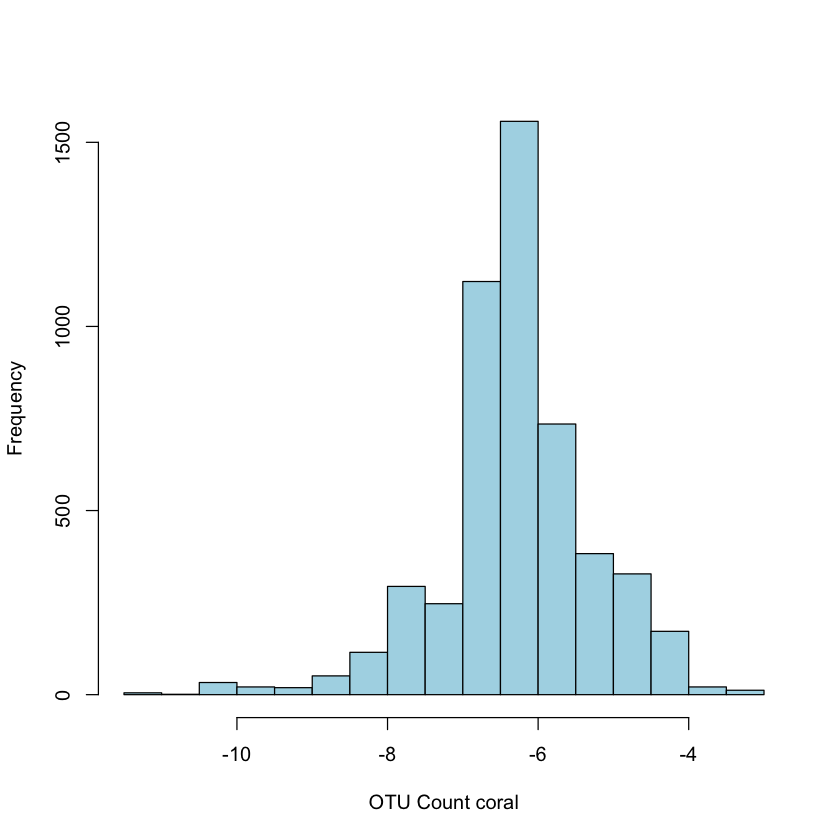

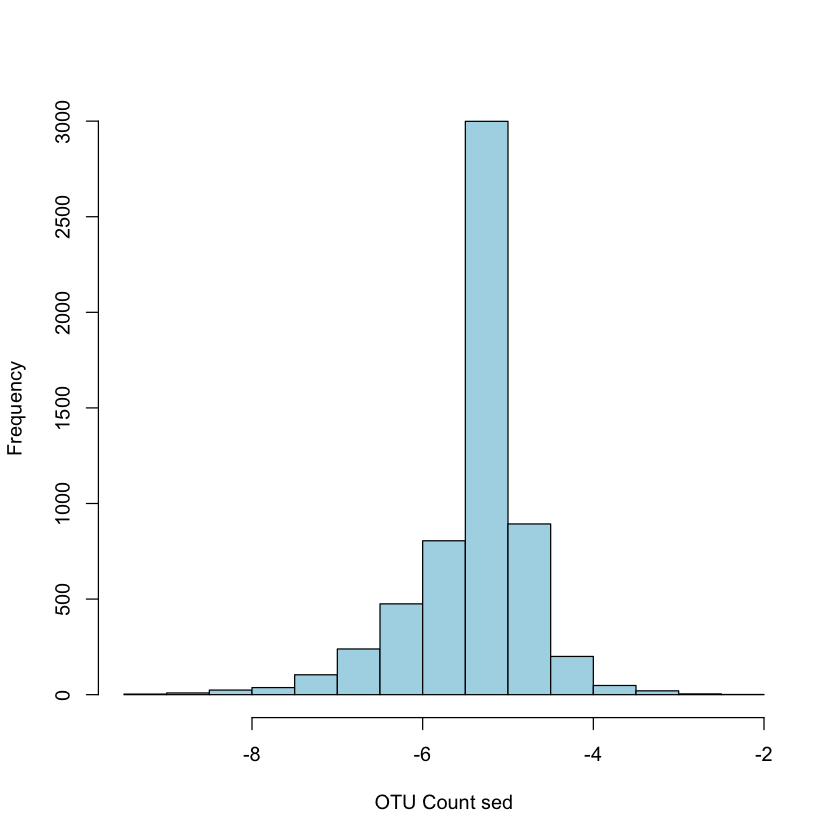

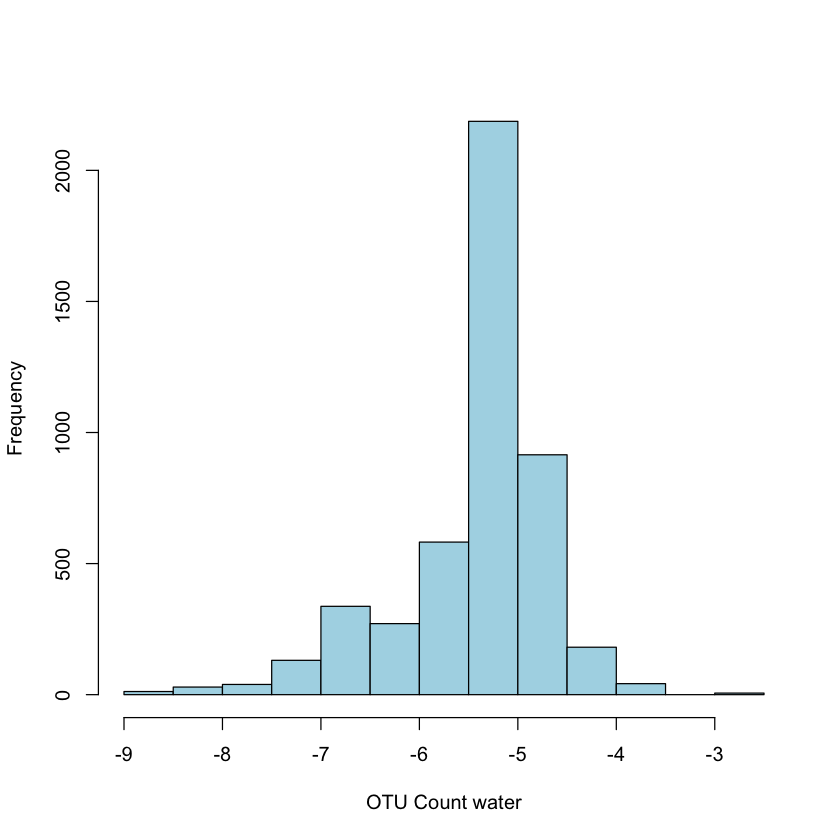

In [12]:
## check data for normality and selected relative abundance 

KO_AH_ra <- t(apply(KO_AH, 1, function(x) x/sum(x)))
hist(log(KO_AH_ra[,1]), xlab = "OTU Count coral", main = "", col = "lightblue")

KO_sed_ra <- t(apply(KO_sed, 1, function(x) x/sum(x)))
hist(log(KO_sed_ra[,1]), xlab = "OTU Count sed", main = "", col = "lightblue")                     

KO_wat_ra <- t(apply(KO_wat, 1, function(x) x/sum(x)))
 hist(log(KO_wat_ra[,1]), xlab = "OTU Count water", main = "", col = "lightblue")                                          

In [13]:
# fix sample names

meta_fill=meta_fill %>% as.tibble() %>%
mutate_at(vars(samp), 
             ~ stringr::str_replace_all(., pattern = "_S[0-9]*", replacement = "")) %>%

column_to_rownames("samp") 


dim(meta_fill)
head(meta_fill)

meta_fil_w=meta_fill_w %>% as.tibble() %>%
mutate_at(vars(samp), 
             ~ stringr::str_replace_all(., pattern = "_S[0-9]*", replacement = "")) %>%

column_to_rownames("samp") 


dim(meta_fill_w)
head(meta_fill_w)



meta_fil_s=meta_fill_s %>% as.tibble() %>%
mutate_at(vars(samp), 
             ~ stringr::str_replace_all(., pattern = "_S[0-9]*", replacement = "")) %>%

column_to_rownames("samp") 


dim(meta_fill_s)
head(meta_fill_s)

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` instead.
ℹ The signature and semantics have changed, see `?as_tibble`.”


[1] 117  44

Sample.ID  Site Site.Name   Region     Project Type  Species_sample
R3S7A1 R3S7A1_S11 NA   Cliff.Green Lower Keys EPA1    Coral DSTO          
R3S7A2 R3S7A2_S11 NA   Cliff.Green Lower Keys EPA1    Coral DSTO          
R3S7A3 R3S7A3_S11 NA   Cliff.Green Lower Keys EPA1    Coral DSTO          
R3S7A4 R3S7A4_S11 NA   Cliff.Green Lower Keys EPA1    Coral DSTO          
R3S7A5 R3S7A5_S11 NA   Cliff.Green Lower Keys EPA1    Coral DSTO          
R3S7C1 R3S7C1_S12 NA   Cliff.Green Lower Keys EPA1    Coral SINT          
       Sample.Type Site.Status Month ⋯ Types Vul_coral End_coral Epi_coral
R3S7A1 Healthy     Vulnerable  June  ⋯ 0     1         0         0        
R3S7A2 Healthy     Vulnerable  June  ⋯ 0     1         0         0        
R3S7A3 Healthy     Vulnerable  June  ⋯ 0     1         0         0        
R3S7A4 Healthy     Vulnerable  June  ⋯ 0     1         0         0        
R3S7A5 Healthy     Vulnerable  June  ⋯ 0     1         0         0        
R3S7C1 Healthy     Vulnerable  June  ⋯ 0     1         0         0        
       Vul_sed End_sed Epi_sed Vul_wat End_wat Epi_wat
R3S7A1 0       0       0       0       0       0      
R3S7A2 0       0       0       0       0       0      
R3S7A3 0       0       0       0       0       0      
R3S7A4 0       0       0       0       0       0      
R3S7A5 0       0       0       0       0       0      
R3S7C1 0       0       0       0       0       0

[1] 96 45

samp        Sample.ID   Site   Site.Name   Region     Project Type 
R3.1.W  R3.1.W_S14  R3.1.W_S14  NA     Cliff.Green Lower Keys EPA1    Water
R3.10.W R3.10.W_S14 R3.10.W_S14 NA     Cliff.Green Lower Keys EPA1    Water
R3.11.W R3.11.W_S14 R3.11.W_S14 Site-G Xesto.Patch Lower Keys EPA1    Water
R3.12.W R3.12.W_S14 R3.12.W_S14 Site-G Xesto.Patch Lower Keys EPA1    Water
R3.13.W R3.13.W_S14 R3.13.W_S14 Site-G Xesto.Patch Lower Keys EPA1    Water
R3.14.W R3.14.W_S14 R3.14.W_S14 Site-G Xesto.Patch Lower Keys EPA1    Water
        Species_sample Sample.Type Site.Status ⋯ Types Vul_coral End_coral
R3.1.W  Water          NA          Vulnerable  ⋯ 2     0         0        
R3.10.W Water          NA          Vulnerable  ⋯ 2     0         0        
R3.11.W Water          NA          Vulnerable  ⋯ 2     0         0        
R3.12.W Water          NA          Vulnerable  ⋯ 2     0         0        
R3.13.W Water          NA          Vulnerable  ⋯ 2     0         0        
R3.14.W Water          NA          Vulnerable  ⋯ 2     0         0        
        Epi_coral Vul_sed End_sed Epi_sed Vul_wat End_wat Epi_wat
R3.1.W  0         0       0       0       1       0       0      
R3.10.W 0         0       0       0       1       0       0      
R3.11.W 0         0       0       0       1       0       0      
R3.12.W 0         0       0       0       1       0       0      
R3.13.W 0         0       0       0       1       0       0      
R3.14.W 0         0       0       0       1       0       0

[1] 90 45

samp        Sample.ID   Site   Site.Name   Region     Project Type    
R3.1.S  R3.1.S_S13  R3.1.S_S13  NA     Cliff.Green Lower Keys EPA1    Sediment
R3.10.S R3.10.S_S13 R3.10.S_S13 NA     Cliff.Green Lower Keys EPA1    Sediment
R3.11.S R3.11.S_S13 R3.11.S_S13 Site-G Xesto.Patch Lower Keys EPA1    Sediment
R3.12.S R3.12.S_S13 R3.12.S_S13 Site-G Xesto.Patch Lower Keys EPA1    Sediment
R3.13.S R3.13.S_S13 R3.13.S_S13 Site-G Xesto.Patch Lower Keys EPA1    Sediment
R3.14.S R3.14.S_S13 R3.14.S_S13 Site-G Xesto.Patch Lower Keys EPA1    Sediment
        Species_sample Sample.Type Site.Status ⋯ Types Vul_coral End_coral
R3.1.S  Sediment       NA          Vulnerable  ⋯ 3     0         0        
R3.10.S Sediment       NA          Vulnerable  ⋯ 3     0         0        
R3.11.S Sediment       NA          Vulnerable  ⋯ 3     0         0        
R3.12.S Sediment       NA          Vulnerable  ⋯ 3     0         0        
R3.13.S Sediment       NA          Vulnerable  ⋯ 3     0         0        
R3.14.S Sediment       NA          Vulnerable  ⋯ 3     0         0        
        Epi_coral Vul_sed End_sed Epi_sed Vul_wat End_wat Epi_wat
R3.1.S  0         1       0       0       0       0       0      
R3.10.S 0         1       0       0       0       0       0      
R3.11.S 0         1       0       0       0       0       0      
R3.12.S 0         1       0       0       0       0       0      
R3.13.S 0         1       0       0       0       0       0      
R3.14.S 0         1       0       0       0       0       0

In [14]:
setdiff(row.names(meta_fill_s), colnames(KO_sed))
setdiff(row.names(meta_fill_w), colnames(KO_wat))

character(0)

character(0)

In [15]:
# fixing sample labels

# Find the row indices of the specified subset of row names
subset_indices <- match(c('518.H', '519.H', '520.H', '521.H', '522.H', '523.H', '527.H', '528.H', '529.H', '533.H', '534.H', '535.H', '536.H', '537.H', '538.H', '542.H', '544.H'), rownames(meta_fill))

# Add "X" in front of the row names at the specified indices
rownames(meta_fill)[subset_indices] <- paste0("X", rownames(meta_fill)[subset_indices])

# Print the modified dataframe
head(meta_fill)


Sample.ID  Site Site.Name   Region     Project Type  Species_sample
R3S7A1 R3S7A1_S11 NA   Cliff.Green Lower Keys EPA1    Coral DSTO          
R3S7A2 R3S7A2_S11 NA   Cliff.Green Lower Keys EPA1    Coral DSTO          
R3S7A3 R3S7A3_S11 NA   Cliff.Green Lower Keys EPA1    Coral DSTO          
R3S7A4 R3S7A4_S11 NA   Cliff.Green Lower Keys EPA1    Coral DSTO          
R3S7A5 R3S7A5_S11 NA   Cliff.Green Lower Keys EPA1    Coral DSTO          
R3S7C1 R3S7C1_S12 NA   Cliff.Green Lower Keys EPA1    Coral SINT          
       Sample.Type Site.Status Month ⋯ Types Vul_coral End_coral Epi_coral
R3S7A1 Healthy     Vulnerable  June  ⋯ 0     1         0         0        
R3S7A2 Healthy     Vulnerable  June  ⋯ 0     1         0         0        
R3S7A3 Healthy     Vulnerable  June  ⋯ 0     1         0         0        
R3S7A4 Healthy     Vulnerable  June  ⋯ 0     1         0         0        
R3S7A5 Healthy     Vulnerable  June  ⋯ 0     1         0         0        
R3S7C1 Healthy     Vulnerable  June  ⋯ 0     1         0         0        
       Vul_sed End_sed Epi_sed Vul_wat End_wat Epi_wat
R3S7A1 0       0       0       0       0       0      
R3S7A2 0       0       0       0       0       0      
R3S7A3 0       0       0       0       0       0      
R3S7A4 0       0       0       0       0       0      
R3S7A5 0       0       0       0       0       0      
R3S7C1 0       0       0       0       0       0

In [16]:
#checking samples labels 
setdiff(row.names(meta_fill), colnames(KO_AH))
setdiff(row.names(meta_fill_s), colnames(KO_sed))
setdiff(row.names(meta_fill_w), colnames(KO_wat))

character(0)

character(0)

character(0)

## Run differntial abundance

In [17]:
fit_data_coral = Maaslin2(
    input_data = KO_AH_ra, 
    input_metadata = meta_fill,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.01,
     cores=4,
     random_effects = c('Site.Name', 'Species_sample'),
 
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/coral/KO/", 
    correction = "BH",
    fixed_effects = c("Site.Status", "Season"),
    reference = c("Site.Status,Vulnerable"))
     

2025-03-25 16:41:48.647604 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/coral/KO//maaslin2.log"
2025-03-25 16:41:48.710005 INFO::Writing function arguments to log file
2025-03-25 16:41:48.717881 INFO::Verifying options selected are valid
2025-03-25 16:41:48.743446 INFO::Determining format of input files
2025-03-25 16:41:48.744441 INFO::Input format is data samples as columns and metadata samples as rows
2025-03-25 16:41:48.811744 INFO::Formula for random effects: expr ~ (1 | Site.Name) + (1 | Species_sample)
2025-03-25 16:41:48.812921 INFO::Formula for fixed effects: expr ~  Site.Status + Season
2025-03-25 16:41:48.813707 INFO::Filter data based on min abundance and min prevalence
2025-03-25 16:41:48.814138 INFO::Total samples in data: 117
2025-03-25 16:41:48.814541 INFO::Min samples required with min abundance for a feature not to be filtered: 11.700000
2025-03-25 16:41

In [18]:
fit_data_sed = Maaslin2(
    input_data = KO_sed_ra, 
    input_metadata = meta_fill_s,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.01,
     cores=4,
     random_effects = c('Site.Name'),

    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/sediment/KO/", 
    correction = "BH",
    fixed_effects = c("Site.Status", "Season"),
    reference = c("Site.Status,Vulnerable"))
     

2025-03-25 16:46:21.508442 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/sediment/KO//maaslin2.log"
2025-03-25 16:46:21.523764 INFO::Writing function arguments to log file
2025-03-25 16:46:21.527907 INFO::Verifying options selected are valid
2025-03-25 16:46:21.528708 INFO::Determining format of input files
2025-03-25 16:46:21.529841 INFO::Input format is data samples as columns and metadata samples as rows
2025-03-25 16:46:21.635617 INFO::Formula for random effects: expr ~ (1 | Site.Name)
2025-03-25 16:46:21.636531 INFO::Formula for fixed effects: expr ~  Site.Status + Season
2025-03-25 16:46:21.637299 INFO::Filter data based on min abundance and min prevalence
2025-03-25 16:46:21.637757 INFO::Total samples in data: 90
2025-03-25 16:46:21.63819 INFO::Min samples required with min abundance for a feature not to be filtered: 9.000000
2025-03-25 16:46:21.695515 INFO::Total 

In [19]:
fit_data_wat = Maaslin2(
    input_data = KO_wat_ra, 
    input_metadata = meta_fill_w,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.01,
     cores=4,
     random_effects = c('Site.Name'),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/water/KO/", 
    correction = "BH",
    fixed_effects = c("Site.Status", "Season"),
    reference = c("Site.Status,Vulnerable"))
     

2025-03-25 16:59:08.09497 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/water/KO//maaslin2.log"
2025-03-25 16:59:08.11364 INFO::Writing function arguments to log file
2025-03-25 16:59:08.11729 INFO::Verifying options selected are valid
2025-03-25 16:59:08.117783 INFO::Determining format of input files
2025-03-25 16:59:08.118544 INFO::Input format is data samples as columns and metadata samples as rows
2025-03-25 16:59:08.19027 INFO::Formula for random effects: expr ~ (1 | Site.Name)
2025-03-25 16:59:08.191218 INFO::Formula for fixed effects: expr ~  Site.Status + Season
2025-03-25 16:59:08.192006 INFO::Filter data based on min abundance and min prevalence
2025-03-25 16:59:08.225575 INFO::Total samples in data: 96
2025-03-25 16:59:08.226266 INFO::Min samples required with min abundance for a feature not to be filtered: 9.600000
2025-03-25 16:59:08.292312 INFO::Total filter

In [20]:
#extract results
res_coral=fit_data_coral$results
head(res_coral)
dim(res_coral)

res_sed=fit_data_sed$results
head(res_sed)
dim(res_sed)

res_wat=fit_data_wat$results
head(res_wat)
dim(res_wat)

feature metadata    value    coef     stderr    pval        
1 K12203  Site.Status Epidemic 4.608414 0.4869201 7.794512e-16
2 K12204  Site.Status Epidemic 4.608414 0.4869201 7.794512e-16
3 K12205  Site.Status Epidemic 4.608414 0.4869201 7.794512e-16
4 K12206  Site.Status Epidemic 4.608414 0.4869201 7.794512e-16
5 K12213  Site.Status Epidemic 4.608414 0.4869201 7.794512e-16
6 K12214  Site.Status Epidemic 4.608414 0.4869201 7.794512e-16
  name                qval         N   N.not.zero
1 Site.StatusEpidemic 1.613724e-12 117 41        
2 Site.StatusEpidemic 1.613724e-12 117 41        
3 Site.StatusEpidemic 1.613724e-12 117 41        
4 Site.StatusEpidemic 1.613724e-12 117 41        
5 Site.StatusEpidemic 1.613724e-12 117 41        
6 Site.StatusEpidemic 1.613724e-12 117 41

[1] 18633    10

feature metadata    value    coef     stderr    pval        
1 K01127  Site.Status Epidemic 4.070643 0.1037722 3.167863e-56
2 K01450  Site.Status Epidemic 4.070643 0.1037722 3.167863e-56
3 K01942  Site.Status Epidemic 4.070643 0.1037722 3.167863e-56
4 K06125  Site.Status Epidemic 4.070643 0.1037722 3.167863e-56
5 K07493  Site.Status Epidemic 4.070643 0.1037722 3.167863e-56
6 K08803  Site.Status Epidemic 4.070643 0.1037722 3.167863e-56
  name                qval         N  N.not.zero
1 Site.StatusEpidemic 3.342623e-53 90 34        
2 Site.StatusEpidemic 3.342623e-53 90 34        
3 Site.StatusEpidemic 3.342623e-53 90 34        
4 Site.StatusEpidemic 3.342623e-53 90 34        
5 Site.StatusEpidemic 3.342623e-53 90 34        
6 Site.StatusEpidemic 3.342623e-53 90 34

[1] 12662    10

feature metadata    value    coef     stderr    pval        
1 K12203  Site.Status Epidemic 3.889783 0.1980415 1.446105e-34
2 K12204  Site.Status Epidemic 3.889783 0.1980415 1.446105e-34
3 K12205  Site.Status Epidemic 3.889783 0.1980415 1.446105e-34
4 K12206  Site.Status Epidemic 3.889783 0.1980415 1.446105e-34
5 K12213  Site.Status Epidemic 3.889783 0.1980415 1.446105e-34
6 K12214  Site.Status Epidemic 3.889783 0.1980415 1.446105e-34
  name                qval         N  N.not.zero
1 Site.StatusEpidemic 2.904261e-31 96 32        
2 Site.StatusEpidemic 2.904261e-31 96 32        
3 Site.StatusEpidemic 2.904261e-31 96 32        
4 Site.StatusEpidemic 2.904261e-31 96 32        
5 Site.StatusEpidemic 2.904261e-31 96 32        
6 Site.StatusEpidemic 2.904261e-31 96 32

[1] 18075    10

In [21]:
# read KEGG modules 
KO_module= read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/module_step_form.20210419.tsv",
               sep="\t", header=TRUE)
head(KO_module)
dim(KO_module)

gene                                                         feature
1 hexokinase/glucokinase [EC:2.7.1.1 2.7.1.2] [RN:R01786]      K00844 
2 hexokinase/glucokinase [EC:2.7.1.1 2.7.1.2] [RN:R01786]      K12407 
3 hexokinase/glucokinase [EC:2.7.1.1 2.7.1.2] [RN:R01786]      K00845 
4 polyphosphate glucokinase [EC:2.7.1.63] [RN:R02189]          K00886 
5 K00918 ADP-dependent glucokinase [EC:2.7.1.147] [RN:R09085]  K08074 
6 ADP-dependent phosphofructokinase [EC:2.7.1.146] [RN:R09084] K00918 
  module_name                                              
1 Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate
2 Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate
3 Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate
4 Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate
5 Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate
6 Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate

[1] 3221    3

In [22]:
# combine KEGG modules withe differential abundance results 

desc_coral =res_coral %>%
merge(KO_module,  by = "feature") %>%
  mutate(Type = "Coral")
head(desc_coral)
dim(desc_coral)

desc_sed= res_sed %>%
#left_join(KO_level)  %>%
merge(KO_module,  by = "feature") %>%
  mutate(Type = "Sediment")
head(desc_sed)
dim(desc_sed)

desc_wat= res_wat %>%
#left_join(KO_level)  %>%
merge(KO_module,  by = "feature") %>%
  mutate(Type = "Water")
head(desc_wat)
dim(desc_wat)

feature metadata    value    coef        stderr    pval        
1 K00002  Season      wet      -2.58509377 0.4059991 6.263431e-09
2 K00002  Season      wet      -2.58509377 0.4059991 6.263431e-09
3 K00002  Site.Status Endemic  -0.72212522 0.3422801 3.723888e-02
4 K00002  Site.Status Endemic  -0.72212522 0.3422801 3.723888e-02
5 K00002  Site.Status Epidemic  0.06700171 0.3467409 8.471480e-01
6 K00002  Site.Status Epidemic  0.06700171 0.3467409 8.471480e-01
  name                qval         N   N.not.zero
1 Seasonwet           4.454447e-07 117 117       
2 Seasonwet           4.454447e-07 117 117       
3 Site.StatusEndemic  1.136377e-01 117 117       
4 Site.StatusEndemic  1.136377e-01 117 117       
5 Site.StatusEpidemic 8.986058e-01 117 117       
6 Site.StatusEpidemic 8.986058e-01 117 117       
  gene                                                  
1 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]
2 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]
3 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]
4 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]
5 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]
6 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]
  module_name                                              Type 
1 Glucuronate pathway (uronate pathway)                    Coral
2 Ascorbate biosynthesis, animals, glucose-1P => ascorbate Coral
3 Glucuronate pathway (uronate pathway)                    Coral
4 Ascorbate biosynthesis, animals, glucose-1P => ascorbate Coral
5 Glucuronate pathway (uronate pathway)                    Coral
6 Ascorbate biosynthesis, animals, glucose-1P => ascorbate Coral

[1] 5085   13

feature metadata    value    coef        stderr     pval       
1 K00002  Site.Status Endemic  -0.02081463 0.13250274 0.875547823
2 K00002  Site.Status Endemic  -0.02081463 0.13250274 0.875547823
3 K00002  Site.Status Epidemic -0.42061745 0.13250274 0.002091346
4 K00002  Site.Status Epidemic -0.42061745 0.13250274 0.002091346
5 K00003  Site.Status Endemic   0.04627003 0.04953454 0.352900201
6 K00003  Site.Status Endemic   0.04627003 0.04953454 0.352900201
  name                qval        N  N.not.zero
1 Site.StatusEndemic  0.900694247 90 90        
2 Site.StatusEndemic  0.900694247 90 90        
3 Site.StatusEpidemic 0.004200606 90 90        
4 Site.StatusEpidemic 0.004200606 90 90        
5 Site.StatusEndemic  0.429573384 90 90        
6 Site.StatusEndemic  0.429573384 90 90        
  gene                                                    
1 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]  
2 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]  
3 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]  
4 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]  
5 homoserine dehydrogenase [EC:1.1.1.3] [RN:R01773 R01775]
6 homoserine dehydrogenase [EC:1.1.1.3] [RN:R01773 R01775]
  module_name                                                   Type    
1 Ascorbate biosynthesis, animals, glucose-1P => ascorbate      Sediment
2 Glucuronate pathway (uronate pathway)                         Sediment
3 Ascorbate biosynthesis, animals, glucose-1P => ascorbate      Sediment
4 Glucuronate pathway (uronate pathway)                         Sediment
5 Methionine biosynthesis, apartate => homoserine => methionine Sediment
6 Threonine biosynthesis, aspartate => homoserine => threonine  Sediment

[1] 3630   13

feature metadata    value    coef        stderr    pval        
1 K00002  Site.Status Epidemic -0.03616738 0.3133877 9.083761e-01
2 K00002  Site.Status Epidemic -0.03616738 0.3133877 9.083761e-01
3 K00002  Season      wet      -2.00294677 0.3129036 6.572558e-09
4 K00002  Season      wet      -2.00294677 0.3129036 6.572558e-09
5 K00002  Site.Status Endemic   0.39876967 0.3133877 2.064541e-01
6 K00002  Site.Status Endemic   0.39876967 0.3133877 2.064541e-01
  name                qval         N  N.not.zero
1 Site.StatusEpidemic 9.356030e-01 96 96        
2 Site.StatusEpidemic 9.356030e-01 96 96        
3 Seasonwet           8.728802e-08 96 96        
4 Seasonwet           8.728802e-08 96 96        
5 Site.StatusEndemic  3.255110e-01 96 96        
6 Site.StatusEndemic  3.255110e-01 96 96        
  gene                                                  
1 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]
2 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]
3 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]
4 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]
5 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]
6 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481]
  module_name                                              Type 
1 Ascorbate biosynthesis, animals, glucose-1P => ascorbate Water
2 Glucuronate pathway (uronate pathway)                    Water
3 Ascorbate biosynthesis, animals, glucose-1P => ascorbate Water
4 Glucuronate pathway (uronate pathway)                    Water
5 Ascorbate biosynthesis, animals, glucose-1P => ascorbate Water
6 Glucuronate pathway (uronate pathway)                    Water

[1] 5136   13

## Supplementary file1 

In [23]:
# combine results into one dataframe
combo_sigs=rbind(desc_coral,desc_sed,desc_wat)

In [24]:
#write.table(combo_sigs,"/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/Submitted/Supplementary_File1.txt",
 #          sep = "\t")

## Supplemental Figure 4

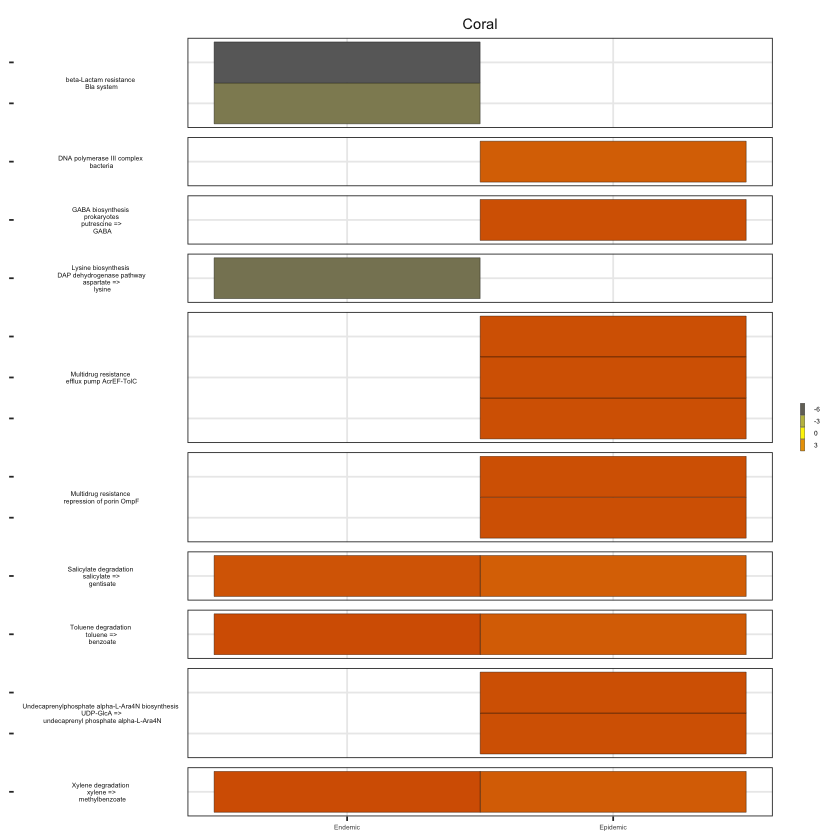

In [25]:
lo <- floor(min(desc_coral$coef))
up <- ceiling(max(desc_coral$coef))
mid <- (lo + up) / 2

fig_ko_coral <- desc_coral %>%
  filter(value != "wet", qval <= 0.001, coef > 4 | coef < -4) %>%
#filter(str_detect(module_name, "resistance")) %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, ", ", "\n "))) %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "Wood", "Wood\n "))) %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "=>", "=>\n "))) %>%
  ggplot(aes(x = value, y = gene, fill = coef)) + 
  geom_tile(color = "black") +
  scale_fill_gradient2(
    low = "#696969", high = "#D55E00", mid = "Yellow", 
    na.value = "white", midpoint = mid, name = NULL
  ) +
  labs(x = NULL, y = NULL, title = NULL) +
  theme_bw() +
  theme(
    strip.background = element_blank(),
    strip.text.y.left = element_text(angle = 0),
    axis.title.x = element_text(size = 5),
    axis.title.y = element_text(size = 5),
    axis.text.y = element_blank(),
    axis.text.x = element_text(size = 4),
    legend.text = element_text(size = 4),
    legend.title = element_text(size = 4),
    strip.text.y = element_text(size = 4)
  ) +
  guides(fill = guide_legend(keywidth = 0.2, keyheight = 0.50)) +
  facet_grid(module_name ~ Type, space = "free", scales = "free", switch = "y")

fig_ko_coral

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/KO.png",
     width = 6, height = 6, units = "in", dpi=300)



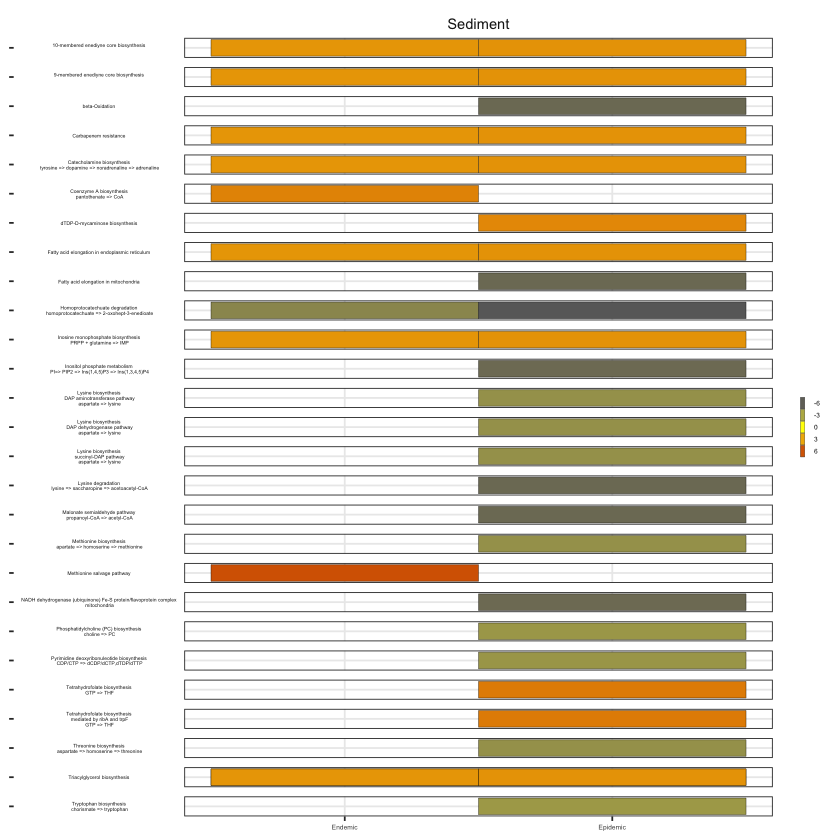

In [26]:
# Define limits and midpoint for color scaling
lo <- floor(min(desc_sed$coef))
up <- ceiling(max(desc_sed$coef))
mid <- (lo + up) / 2

# Create the heatmap plot
fig_ko_sed <- desc_sed %>%
  filter(!str_detect(module_name, "eukaryotes")) %>%  # Remove rows containing "eukaryotes" in module_name
  mutate(across(where(is.character), ~ str_replace_all(.x, "_", " "))) %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, ", ", "\n "))) %>%
  mutate(across(where(is.character), ~ str_replace(
    .x, 
    "malonyl-CoA => 3-hydroxyhexadeca-4,6,8,10,12,14-hexaenoyl-ACP => (9|10)-membered enediyne core", 
    ""
  ))) %>%
 filter(value != "wet", qval <= 0.001, coef > 3.5 | coef < -3.5) %>%
  ggplot(aes(x = value, y = gene, fill = coef)) + 
  geom_tile(color = "black") +
  scale_fill_gradient2(
    low = "#696969", high = "#D55E00", mid = "Yellow", 
    na.value = "white", midpoint = mid, name = NULL
  ) +
  labs(x = NULL, y = NULL, title = NULL) +
  theme_bw() +
  facet_grid(module_name ~ Type, space = "free", scales = "free", switch = "y") +
  theme(
    strip.background = element_blank(),
    strip.text.y.left = element_text(angle = 0),
    strip.text.y = element_text(size = 3),
    axis.title.x = element_text(size = 9),
    axis.title.y = element_text(size = 5),
    axis.text.y = element_blank(),
    axis.text.x = element_text(size = 4),
    legend.text = element_text(size = 4),
    legend.title = element_text(size = 4)
  ) +
  guides(fill = guide_legend(keywidth = 0.2, keyheight = 0.50))

fig_ko_sed


ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/KO_sed.png",
     width = 7, height = 7, units = "in", dpi=300)

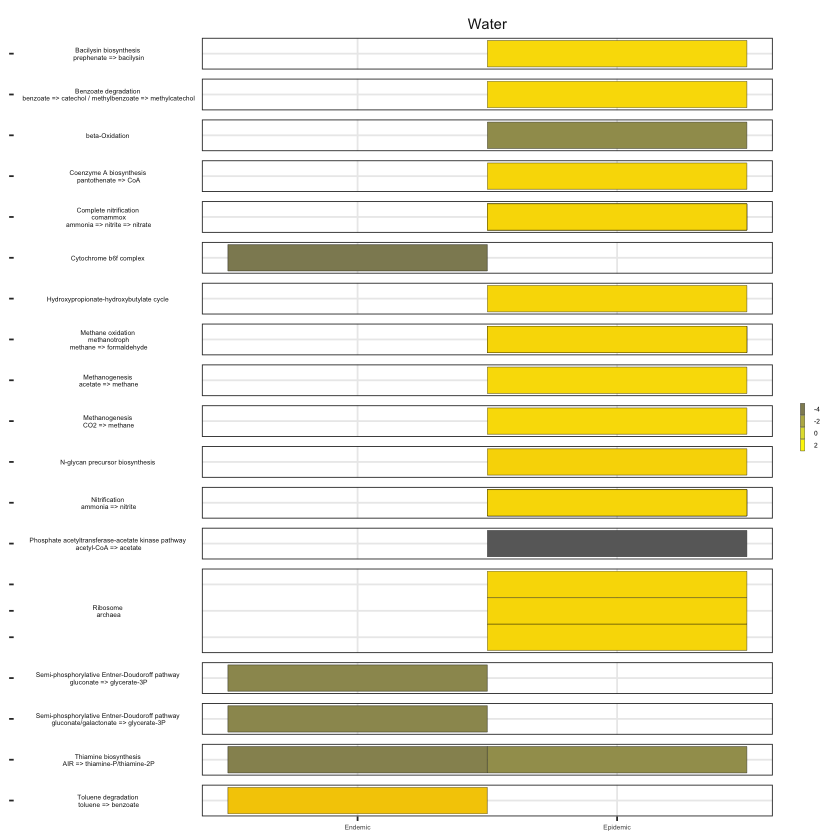

In [27]:
lo = floor(min(desc_wat$coef))
up = ceiling(max(desc_wat$coef))
mid = (lo + up)/2
fig_ko_wat=desc_wat %>%
 mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = "_",
    replacement = " ")  %>%
  mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = ",",
    replacement = "\n")  %>%
   filter(value != "wet", qval <= 0.001, coef > 3 | coef < -3) %>%
  filter(!str_detect(module_name, "eukaryotes")) %>%  # Remove rows containing "eukaryotes" in module_name

  ggplot(aes(x = value, y = gene, fill = coef)) + 
  geom_tile(color = "black") +
  scale_fill_gradient2(low = "#696969", high = "#D55E00", mid = "Yellow", 
                       na.value = "white", midpoint = mid, 
                       #limit = c(lo, up),
                       name = NULL) +
  #geom_text(aes(coef, feature), size = 2) +
  scale_color_identity() +
  labs(x = NULL, y = NULL, title= NULL) +
  theme_bw() +
  #facet_grid(Order~Type, space ="free", scales="free"
   #          , switch="y") +
 theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(axis.title.x = element_text(size = 5)) +
  theme(axis.title.y = element_text(size = 8)) +
 theme(axis.text.y = element_blank()) +
  theme(axis.text.x = element_text(size =4)) +
guides(fill = guide_legend(keywidth = 0.2, , keyheight =.50)) +
  theme(legend.text =element_text(size=4)) +
  theme(legend.title = element_text(size=4)) +
  theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(strip.text.y = element_text(size = 2.5)) +
 theme(strip.text.y = element_text(size = 4)) +
  #facet_grid(Superclass2~., space ="free", scales="free", switch="y") 
  facet_grid(module_name~Type, space ="free", scales="free", switch="y") 
fig_ko_wat
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/KO_wat.png",
     width = 7, height = 5, units = "in", dpi=300)

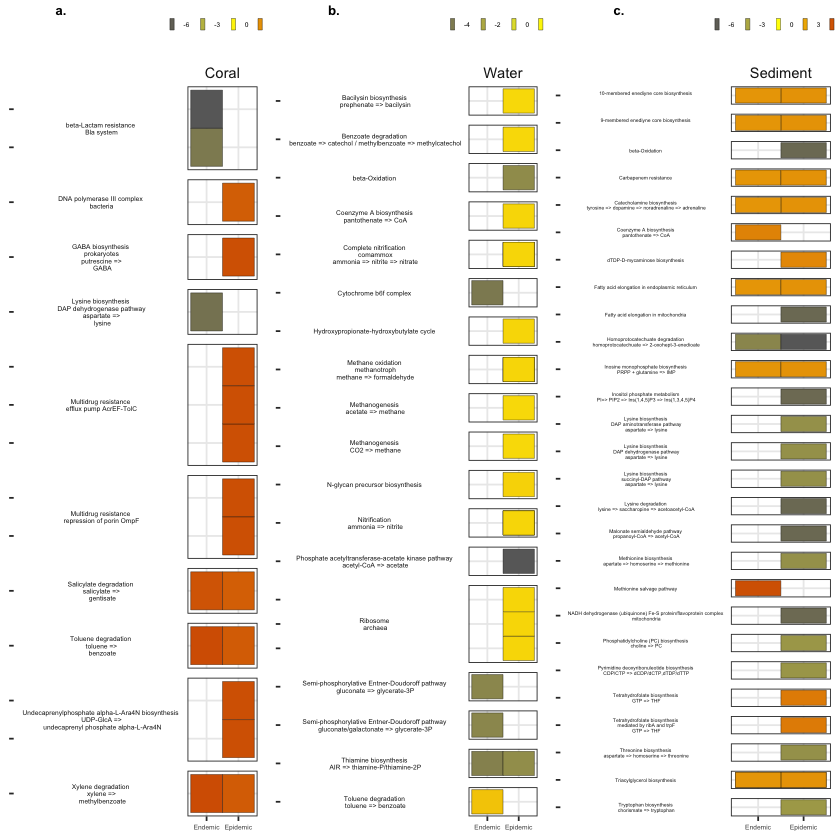

In [28]:
figs_ko=ggarrange(fig_ko_coral, fig_ko_wat, fig_ko_sed, nrow = 1, ncol=3, common.legend = FALSE, legend="top",
                           labels = c("         a.", "          b.", "           c."), widths = c(1, 1.05, 1.10), font.label = list(size = 8))
figs_ko
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/Supp_Fig4.png",
     width = 7.5, height = 6.5, units = "in", dpi=300)

### Counts of significant factors

In [29]:
desc_coral %>%
  #filter(value == "Endemic", qval <= 0.05, coef>3) %>%
  count(gene) %>%
  filter(str_detect(gene, "cationic")) %>%
  mutate(total_count = sum(n))  # Adds a column with the total sum of counts



desc_sed %>%
  filter(value != "wet", qval <= 0.05) %>%
  count(module_name) %>%
  filter(str_detect(module_name, "biosynthesis")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts

head()

desc_wat %>%
filter(value != "wet", qval <= 0.05) %>%
  count(module_name) %>%
  filter(str_detect(module_name, "biosynthesis")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts
head()

gene                                                                                                    
1 vraF; cationic antimicrobial peptide transport system ATP-binding protein [COG:COG1136] [TC:3.A.1.134.7]
2 vraG; cationic antimicrobial peptide transport system permease protein [COG:COG0577] [TC:3.A.1.134.7]   
  n total_count
1 3 6          
2 3 6

module_name                                                                                                                       
1 10-membered enediyne core biosynthesis, malonyl-CoA => 3-hydroxyhexadeca-4,6,8,10,12,14-hexaenoyl-ACP => 10-membered enediyne core
2 9-membered enediyne core biosynthesis, malonyl-CoA => 3-hydroxyhexadeca-4,6,8,10,12,14-hexaenoyl-ACP => 9-membered enediyne core  
3 ADP-L-glycero-D-manno-heptose biosynthesis                                                                                        
4 Abscisic acid biosynthesis, beta-carotene => abscisic acid                                                                        
5 Adenine ribonucleotide biosynthesis, IMP => ADP,ATP                                                                               
6 Arginine biosynthesis, glutamate => acetylcitrulline => arginine                                                                  
  n total_count
1 2 619        
2 2 619        
3 6 619        
4 2 619        
5 2 619        
6 4 619

module_name                                                                                                                       
1 10-membered enediyne core biosynthesis, malonyl-CoA => 3-hydroxyhexadeca-4,6,8,10,12,14-hexaenoyl-ACP => 10-membered enediyne core
2 9-membered enediyne core biosynthesis, malonyl-CoA => 3-hydroxyhexadeca-4,6,8,10,12,14-hexaenoyl-ACP => 9-membered enediyne core  
3 ADP-L-glycero-D-manno-heptose biosynthesis                                                                                        
4 Abscisic acid biosynthesis, beta-carotene => abscisic acid                                                                        
5 Arginine biosynthesis, glutamate => acetylcitrulline => arginine                                                                  
6 Ascorbate biosynthesis, animals, glucose-1P => ascorbate                                                                          
  n total_count
1 1 210        
2 1 210        
3 5 210        
4 2 210        
5 1 210        
6 3 210

In [30]:
desc_coral %>%
  #filter(value != "wet", qval <= 0.05) %>%
  count(module_name) %>%
  filter(str_detect(module_name, "degradation")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts

head()

desc_sed %>%
  #filter(value != "wet", qval <= 0.05) %>%
  count(module_name) %>%
  filter(str_detect(module_name, "degradation")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts

head()

desc_wat %>%
#filter(value != "wet", qval <= 0.05) %>%
  count(module_name) %>%
  filter(str_detect(module_name, "degradation")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts
head()

module_name                                                                  
1 Acylglycerol degradation                                                     
2 Anthranilate degradation, anthranilate => catechol                           
3 Ascorbate degradation, ascorbate => D-xylulose-5P                            
4 Benzene degradation, benzene => catechol                                     
5 Benzoate degradation, benzoate => catechol / methylbenzoate => methylcatechol
6 Benzoyl-CoA degradation, benzoyl-CoA => 3-hydroxypimeloyl-CoA                
  n  total_count
1  3 495        
2  9 495        
3 21 495        
4 18 495        
5 12 495        
6 15 495

module_name                                                                  
1 Acylglycerol degradation                                                     
2 Anthranilate degradation, anthranilate => catechol                           
3 Ascorbate degradation, ascorbate => D-xylulose-5P                            
4 Benzene degradation, benzene => catechol                                     
5 Benzoate degradation, benzoate => catechol / methylbenzoate => methylcatechol
6 Benzoate degradation, cyclohexanecarboxylic acid =>pimeloyl-CoA              
  n  total_count
1  2 348        
2  2 348        
3 14 348        
4 12 348        
5  8 348        
6  4 348

module_name                                                                  
1 Acylglycerol degradation                                                     
2 Ascorbate degradation, ascorbate => D-xylulose-5P                            
3 Benzene degradation, benzene => catechol                                     
4 Benzoate degradation, benzoate => catechol / methylbenzoate => methylcatechol
5 Benzoyl-CoA degradation, benzoyl-CoA => 3-hydroxypimeloyl-CoA                
6 Chondroitin sulfate degradation                                              
  n  total_count
1  3 483        
2 21 483        
3 18 483        
4 12 483        
5 15 483        
6  9 483

In [31]:
desc_coral %>%
  filter(value != "wet", qval <= 0.05) %>%
  count(name) %>%
  filter(str_detect(name, "Endemic")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts

head()

desc_sed %>%
  filter(value != "wet", qval <= 0.05) %>%
  count(name) %>%
  filter(str_detect(name, "Endemic")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts

head()

desc_wat %>%
filter(value != "wet", qval <= 0.05) %>%
  count(name) %>%
  filter(str_detect(name, "Endemic")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts
head()

name               n   total_count
1 Site.StatusEndemic 226 226

name               n   total_count
1 Site.StatusEndemic 895 895

name               n   total_count
1 Site.StatusEndemic 332 332

In [32]:
desc_coral %>%
  filter(value != "wet", qval <= 0.05) %>%
  count(name) %>%
  filter(str_detect(name, "Epidemic")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts

head()

desc_sed %>%
  filter(value != "wet", qval <= 0.05) %>%
  count(name) %>%
  filter(str_detect(name, "Epidemic")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts

head()

desc_wat %>%
filter(value != "wet", qval <= 0.05) %>%
  count(name) %>%
  filter(str_detect(name, "Epidemic")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts
head()

name                n   total_count
1 Site.StatusEpidemic 172 172

name                n    total_count
1 Site.StatusEpidemic 1067 1067

name                n   total_count
1 Site.StatusEpidemic 394 394